Prédire le prix des maisons dans un quartier en fonction des caractéristiques
telles que le bien être, le nombre de magasins, la criminalité... etc.

On utilise une régression linéaire multiple !

In [8]:
# Import des librairies

import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance 
import matplotlib.pyplot as plt  

In [9]:
# Charger le fichier CSV qui contient les informations à propos des maisons 
data = pd.read_csv("datasets/housing.csv")

# On stocke la colonne prix en tant que variable que l'on veut prédire 
# en fonction des caractéristiques des autres colonnes .
prices = data['MEDV']

# Les autres colonnes permettront de prédire les futurs prix des maisons, 
# en anglais, 
# on appelle cela FEATURES, cela peut par exemple être le 
# taux de crimes, le nombre de femmes, le taux d'infestation par des rats 
# etc ...
features = data.drop('MEDV', axis = 1)
    
# Succès du chargement 
print("Le dataset des maisons contient  {} lignes avec {} variables(colonnes) chacune.".format(*data.shape))

Le dataset des maisons contient  489 lignes avec 4 variables(colonnes) chacune.


In [10]:
# On réalise quelques statistiques de base 

# Prix minimum d'une maison dans toutes les lignes
minimum_price = np.amin(prices)

# Prix max d'une maison dans toutes les lignes
maximum_price = np.amax(prices)

# Moyenne des prix des maisons
mean_price = np.mean(prices)

# Médiane des prix des maisons
median_price = np.median(prices)

# Ecart type du prix des maisons
std_price = np.std(prices)

# Afficher les stats dans la console
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


C:\Users\secretgirl\AppData\Local\Temp\ipykernel_12576\3516617831.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seabornInstance.distplot(data['MEDV'])


<AxesSubplot: xlabel='MEDV', ylabel='Density'>

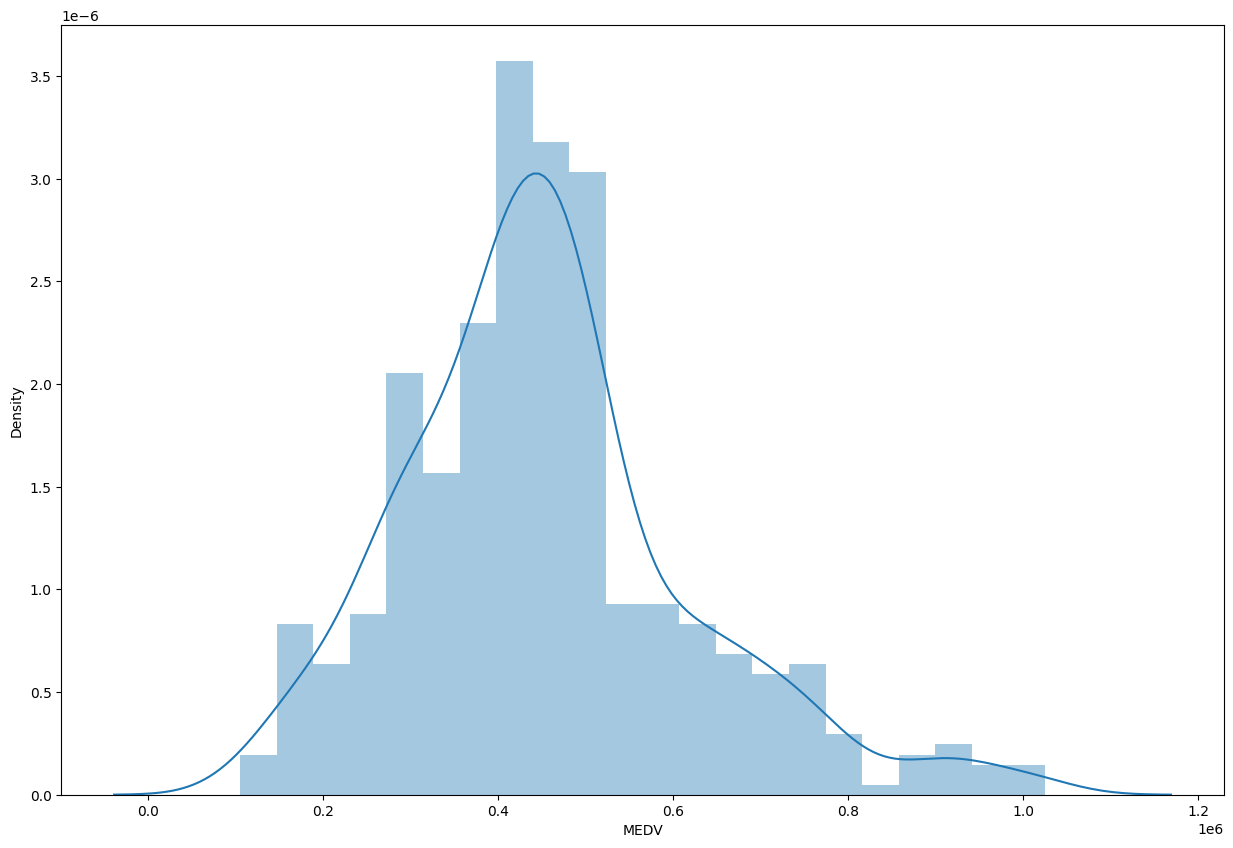

In [11]:
# Afficher un graphique en barre par prix de maisons
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['MEDV'])

Training and testing split was successful.


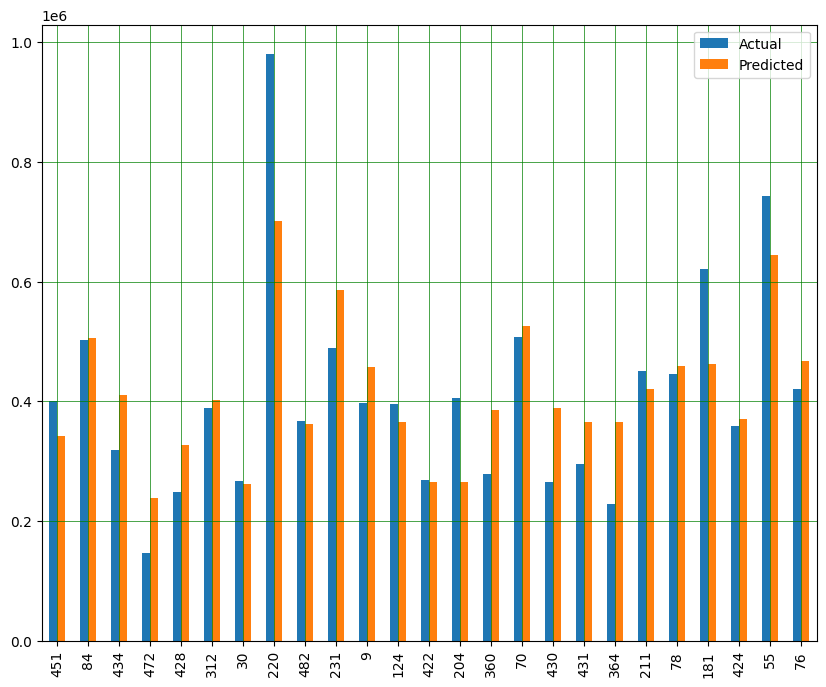

In [12]:
# Effectuer une regression multiple avec les features multiples

# Shuffle and split the data into training and testing subsets
# Séparer les data en entrainement et test 
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# On entraine l'algorithme de régression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Success
print("Training and testing split was successful.")

# y_pred contient la prédiction des prix des maisons en fonction 
# des 3 colonnes features
y_pred = regressor.predict(X_test)

# Créer un graphique comparant la prédiction du prix des maisons 
# en fonction des 3 colonnes features, par rapport aux résultats réels 
# du dataset appelé y_test.
# Ca sert à voir si notre régression est efficace ou pas pour prédire 
# à l'avenir le prix des maisons en fonction des 3 colonnes features.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()





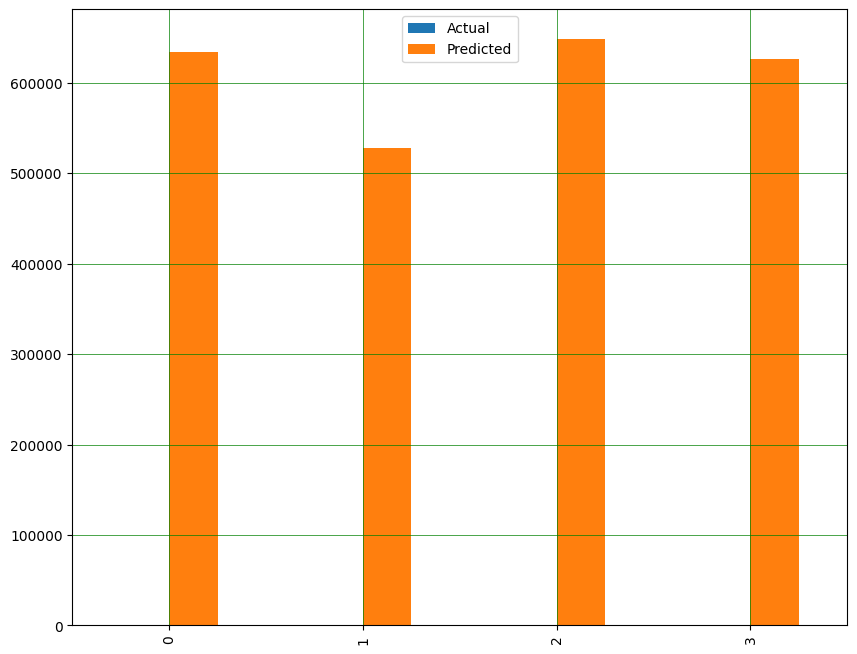

In [13]:
# Maintenant, on charge un deuxème fichiers de 4 maison neuves 
# dont on a pas encore fixé les prix
# dont les variables features sont différentes, la regression multiple 
# va ainsi nous permettre de fixer un prix réaliste en fonction de celui
# des maisons du fichier initial :

# dans ce fichier, la colonne prix est à zéro , car on demande à la 
# regression linéaire de les calculer en fonction des features.
data = pd.read_csv("datasets/housing_to_predict.csv")

# On récupères les prix à zéro 
prices = data['MEDV']
# On récupères les features
X = data.drop('MEDV', axis = 1)

# On exécute le prédicteur de prix en fonction des features ... !
y_pred = regressor.predict(X)

# On affiche un graphique 
df = pd.DataFrame({'Actual': prices, 'Predicted': y_pred})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
